In [1]:
import helper

In [2]:
tifs = helper.read_all_tifs(positive_strand_only=True, return_dict=True)

In [3]:
genome = helper.organize_genome_by_chrom(helper.read_bedfile(), positive_strand_only=True)

In [4]:
reads = helper.read_bamfile()
density_4, _ = helper.generate_read_density_chrom("chrIV", reads)

In [6]:
from random_junctions import get_max_possible_genomic_regions, get_5utr_boundaries
import matplotlib.pyplot as plt
import numpy as np

INFO:helper:Reading bedfile...
INFO:helper:Done reading bedfile ../indexes/yeast-all.bed
INFO:helper:Processed TIFs in chromosome 1...
INFO:helper:Processed TIFs in chromosome 2...
INFO:helper:Processed TIFs in chromosome 3...
INFO:helper:Processed TIFs in chromosome 4...
INFO:helper:Processed TIFs in chromosome 5...
INFO:helper:Processed TIFs in chromosome 6...
INFO:helper:Processed TIFs in chromosome 7...
INFO:helper:Processed TIFs in chromosome 8...
INFO:helper:Processed TIFs in chromosome 9...
INFO:helper:Processed TIFs in chromosome 10...
INFO:helper:Processed TIFs in chromosome 11...
INFO:helper:Processed TIFs in chromosome 12...
INFO:helper:Processed TIFs in chromosome 13...
INFO:helper:Processed TIFs in chromosome 14...
INFO:helper:Processed TIFs in chromosome 15...
INFO:helper:Processed TIFs in chromosome 16...
INFO:helper:Done reading TIF file... returning a dictionary


In [7]:
gene_start, gene_end = get_max_possible_genomic_regions()

In [8]:
genes = ['YBR106W',
'YBR158W',
'YBR199W',
'YNR263W',
'YCL040W',
'YDL051W']

chrom = "chrIV"

for gn in genes:
    gene = genome[chrom][gn]
    
    plt.plot(range(gene_start[chrom][gn], gene_end[chrom][gn]),
                     density[gene_start[chrom][gn]:gene_end[chrom][gn]])        
    junctions = np.unique(sorted(tifs[chrom][gn]['t5'].tolist()))       
    for j in junctions:
        plt.axvline(j, color='k', alpha=0.5)

    plt.xlabel("Genomic position (nt)")
    plt.ylabel("Read density")

    plt.title("Read density across 5'UTR of gene " + gn)
    plt.close()

KeyError: 'YBR106W'

YDL248W
YDL241W
YDL240W
YDL237W
YDL236W
YDL233W
YDL232W
YDL230W
YDL229W
YDL225W
YDL221W
YDL219W
YDL218W
YDL212W
YDL208W
YDL207W
YDL206W
YDL204W
YDL202W
YDL201W
YDL195W
YDL193W
YDL192W
YDL191W
YDL189W
YDL185W
YDL182W
YDL181W
YDL180W
YDL179W
YDL178W
YDL176W
YDL170W
YDL168W
YDL165W


KeyboardInterrupt: 

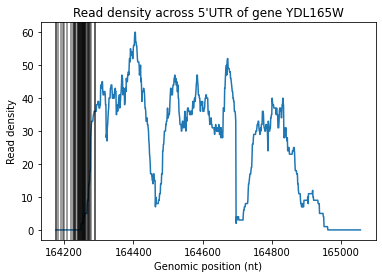

In [10]:

for gn, gene in genome[chrom].items():
    if gene.strand == "+" and gn in tifs[chrom] and gn in gene_start[
            chrom] and gn in gene_end[chrom]:
        print(gn)
        plt.plot(range(gene_start[chrom][gn], gene_end[chrom][gn]),
                 density_4[gene_start[chrom][gn]:gene_end[chrom][gn]])
        junctions = np.unique(sorted(tifs[chrom][gn]['t5'].tolist()))           
        for j in junctions:
            plt.axvline(j, color='k', alpha=0.5)

        plt.xlabel("Genomic position (nt)")
        plt.ylabel("Read density")

        plt.title("Read density across 5'UTR of gene " + gn)

        plt.savefig("bulk/gene_" + gn + ".png")
        plt.close()